In [16]:
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
from scipy import stats as stats

In [30]:
az.style.use('arviz-darkgrid')

In [31]:
ways = np.array([0 ,3, 8, 9])

In [32]:
ways = ways/ways.sum()

In [33]:
ways

array([0.  , 0.15, 0.4 , 0.45])

In [34]:
stats.binom.pmf(6, 9, p=0.8)

0.17616076799999994

In [35]:
#define grid
grid = np.linspace(0,1,20)

In [36]:
#define prior
prior = np.repeat(1,20)

In [37]:
#compute likelihood of each value of the grid
likelihood = stats.binom.pmf(6,9,grid)

In [38]:
#compute product of likelihood and prior
posterior = likelihood*prior

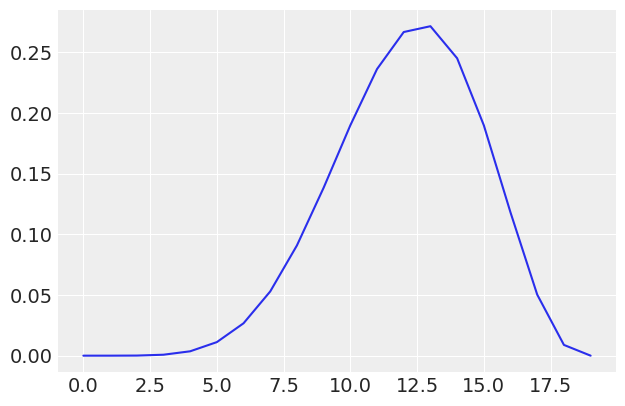

In [86]:
plt.plot(posterior)

# Build function for grid approximation

In [82]:
def binom_grid_approximation(w,n,gridpoints):
    grid = np.linspace(0,1,gridpoints)
    prior=np.repeat(1,gridpoints)
    likelyhood = stats.binom.pmf(w,n,grid)
    posterior = likelyhood * prior /(likelyhood*prior).sum()
    return grid, posterior

In [83]:
coarse_grid, coarse_posterior = binom_grid_approximation(6,9,5)

In [84]:
fine_grid, fine_posterior = binom_grid_approximation(6,9,100)

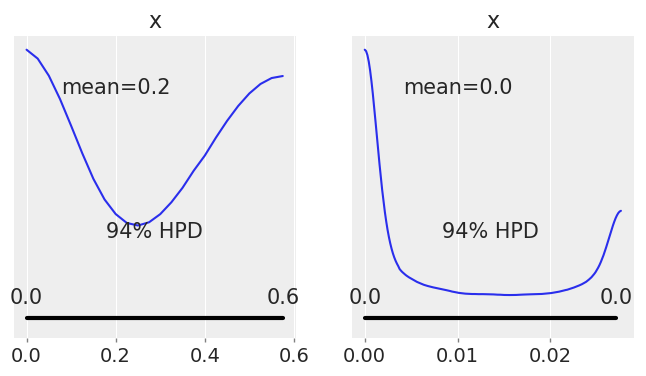

In [95]:
_,ax = plt.subplots(1,2,figsize = (8,4))
ax[0].plot(coarse_posterior, ax=ax[0])
az.plot_posterior(fine_posterior, ax=ax[1])